# Segmentation
* 시맨틱 세그멘테이션(Semantic Segmentation)
* 인스턴스 세그멘테이션(Instance Segmentation)
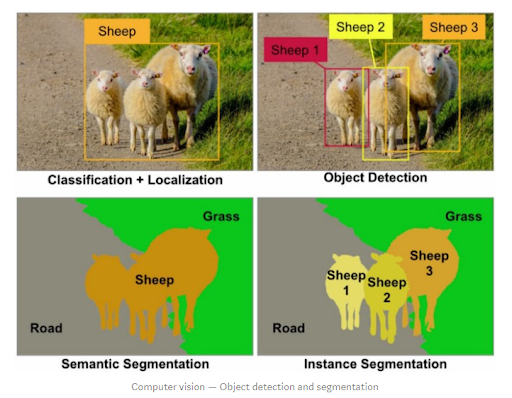

## 1. Semantic Segmentation
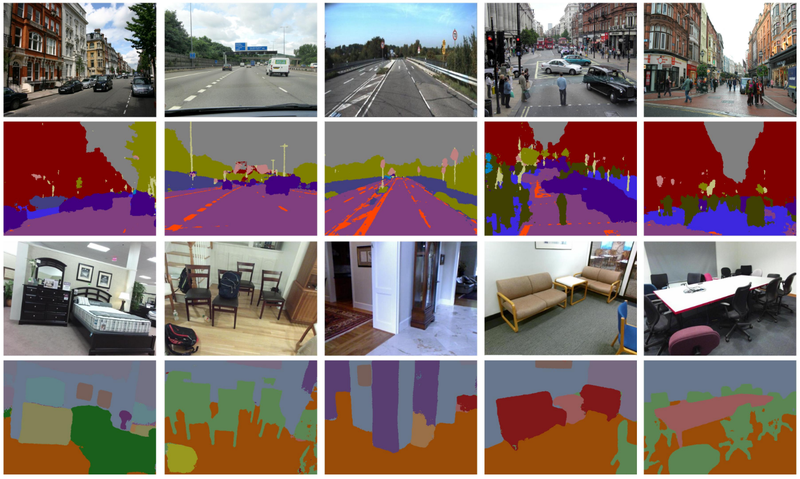
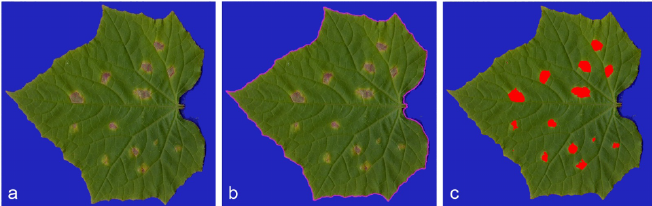
* 사진에서 단지 어떤 물체들이 모여 있는 영역의 위치를 인식(localization)과 이 물체들이 양이라는 것을 판별(Classification) 하는 접근법
* 시맨틱 세그멘테이션의 대표적인 모델인 U-Net의 구조
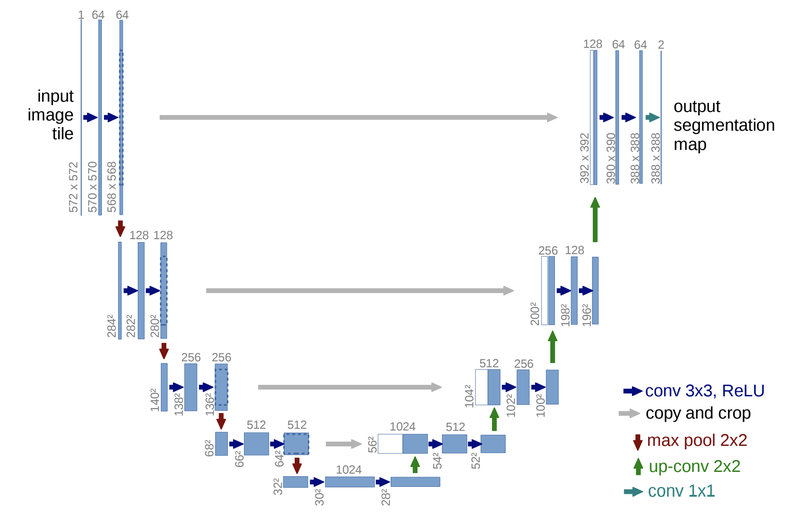
* 두 가지의 클래스를 문제에 따라 다르게 정의하면 클래스에 따른 시맨틱 세그멘테이션 맵(Semantic Segmentation Map)을 얻을 수 있다.

## 2. Instance Segmentation
* 개체 하나하나의 위치를 정확히 식별하는 객체 인식(Object Detection)의 접근법
* 같은 클래스 내에서도 각 개체(instance)들을 분리하여 세그멘테이션을 수행한다.
* 물체 검출(Object Detection) 모델로 각 개체를 구분하고 이후에 각 개체 별로 시맨틱 세그멘테이션을 수행하는 방식 중 대표적인 것이 Mask R-CNN 이다.
* 이는 Detection의 가장 대표적인 Faster-R-CNN을 계승한 것으로서, Faster-R-CNN의 아이디어인 Region of Interest Pooling Layer(RoIPool) 개념을 개선하여 정확한 Segmentation에 유리하게 한 **RoIAlign**과 **클래스별 마스크 분리**라는 단순한 두 가지 아이디어를 통해, 클래스별 Object Detection과 시멘틱 세그멘테이션을 사실상 하나의 Task로 엮어낸 것으로 평가받는 중요한 모델임.
### (1) Faster R-CNN 계열에서 사용하는 RoIPool 개념과 그 한계점
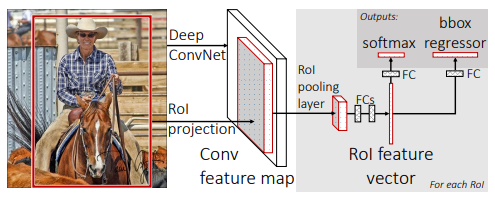
* 위 RoIPool Layer는 다양한 RoI 영역을 Pooling을 통해 동일한 크기의 Feature map으로 추출해내는 레이어이다.
* 이후 이 고정 사이즈의 Feature map을 바탕으로 바운딩 박스와 object의 클래스를 추론해 낸다.
  * Object Detection을 위해서는 크게 문제가 되지 않으나 object 영역의 정확한 마스킹을 필요로 하는 Segmentation 문제에서는 다음 문제점이 있다.
    * RoIPool 과정에서 Quantization이 필요하다.
    * 이미지에서 RoI 영역의 크기는 다양한데, 모든 RoI 영역의 가로/세로 픽셀 크기가 16의 배수인 것은 아니다.
    * 아래 그림의 예에서 가로 200, 세로 145 픽셀짜리 RoI 영역을 16x16으로 분할된 영역 중 절반 이상이 RoI 영역에 덮이는 곳들로 끼워 맞추다 보면, 어쩔 수 없이 RoI 영역 밖이 포함되는 경우도 있고, 자투리 영역이 버려지는 경우도 생긴다.
    * 이런 문제점으로 인해 필연적으로 시맨틱 세그멘테이션의 정보손실과 왜곡을 야기한다.
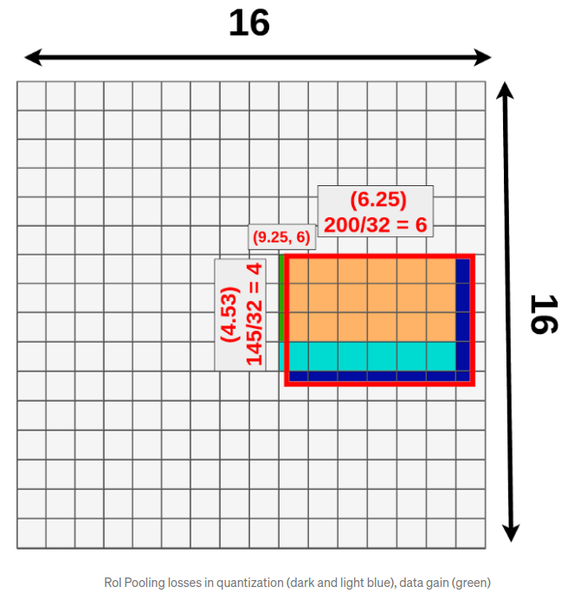

### (2) Mask R-CNN의 RoIAlign
* Mask R-CNN의 RoIAlign은 Quantization하지 않고도 RoI를 처리할 고정 사이즈의 Feature map을 생성할 수 있게 아이디어를 제공한다.
* 아이디어의 핵심은 RoI 영역을 pooling layer의 크기에 맞추어 등분한 후, RoIPool을 했을 때의 quantization 영역 중 가까운 것들과의 bilinear interpolation 계산을 통해 생성해야 할 Feature Map을 계산해 낸다는 점이다.
* Mask R-CNN은 Faster R-CNN에서 특성 추출방식을 'RoIAlign' 방식으로 개선을 하고 세그멘테이션을 더한 방식이다.
* 아래 Faster R-CNN과 비교한 구조도를 보면 U-Net처럼 Feature map의 크기를 키워 mask를 생성해 내는 부분을 통해 인스턴스에 해당하는 영역, 즉 인스턴스 맵을 추론한다.
* Mask R-CNN은 클래스에 따른 마스크를 예측할 때, 여러 가지 태스크를 한 모델로 학습하여 물체 검출의 성능을 높인다.
* 아래 그림을 보면 Bounding box Regression을 하는 Bbox head와 마스크를 예측하는 Mask Head의 두 갈래로 나뉘는 것을 볼 수 있다.
* Mask Map의 경우 시맨틱 세그멘테이션과 달리 상대적으로 작은 28x28의 Feature map 크기를 갖는다.
* RoIAlign을 통해 줄어든 특성에서 마스크를 예측하기 때문에 사용하려는 목적에 따라서 정확한 마스크를 얻으려는 경우에는 부적합할 수 있다.
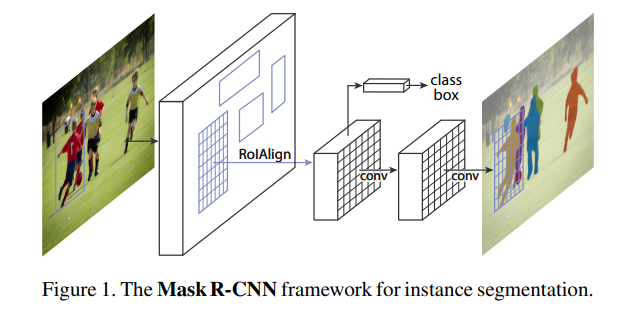

## 3. 주요 세그멘테이션 모델 (1) FCN(Fully Convolutional Network)
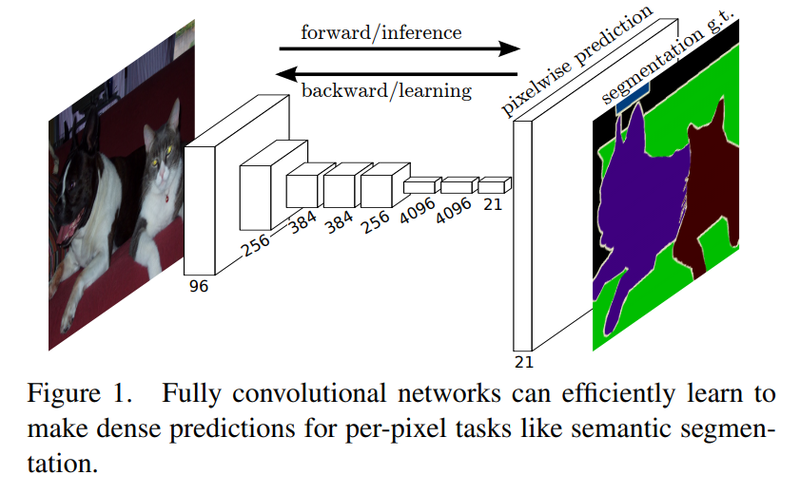
* 이미지넷 챌린지(ImageNet Challenge)에서 좋은 성적을 거두었던 AlexNet, VGG-16 등의 모델을 세그멘테이션에 맞게 변형한 모델이다.
* FCN에서는 세그멘테이션을 하기 위해서 네트워크 뒷단에 fully connected layer 대신 CNN을 붙인다.
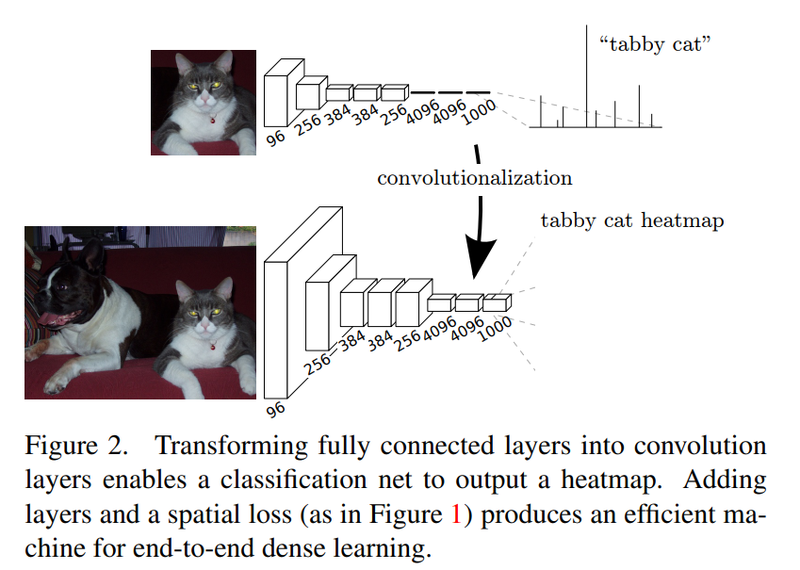
* 위치정보를 유지하면서 클래스 단위의 히트맵(heat map)을 얻어 세그멘테이션을 하기 위해, fully connected layer를 CNN으로 대체한다.
* 위치의 특성을 유지하면서 이미지 분류를 하기 위해서 마지막 CNN은 1x1의 커널 크기(kernel size)와 클래스의 개수만큼의 채널 가진다.
* 히트맵의 크기는 일반적으로 원본 이미지보다 작아지는데 이를 키우기 위해 upsampling방법 중 Deconvolution과 Interpolation 방식을 사용한다.
* Deconvolution은 컨볼루션 연산을 거꾸로 해준 것이라고 볼 수 있다. Interpolation은 보간법으로 주어진 값들을 통해 추정해야 하는 픽셀(여기서는 특성 맵의 크기가 커지면서 메꾸어야 하는 중간 픽셀들을 의미합니다.) 추정하는 방법이다.
* Skip Architecture 방법을 사용해 성능을 향상시킨다.
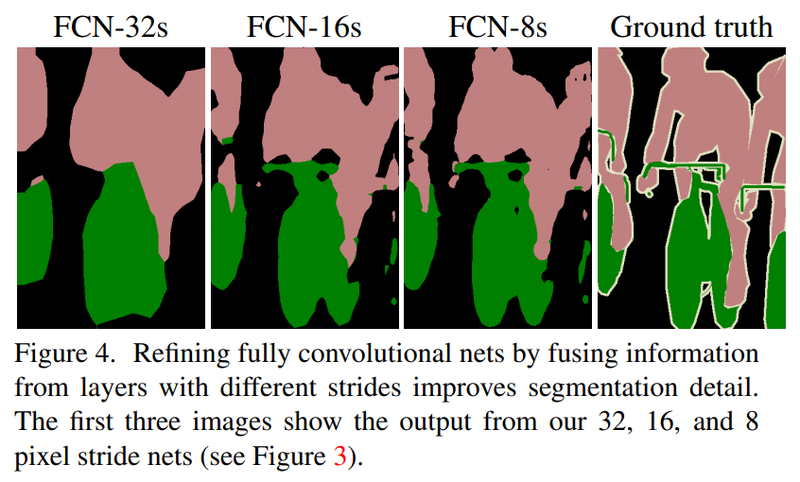
## 4. 주요 세그멘테이션 모델 (2) U-Net
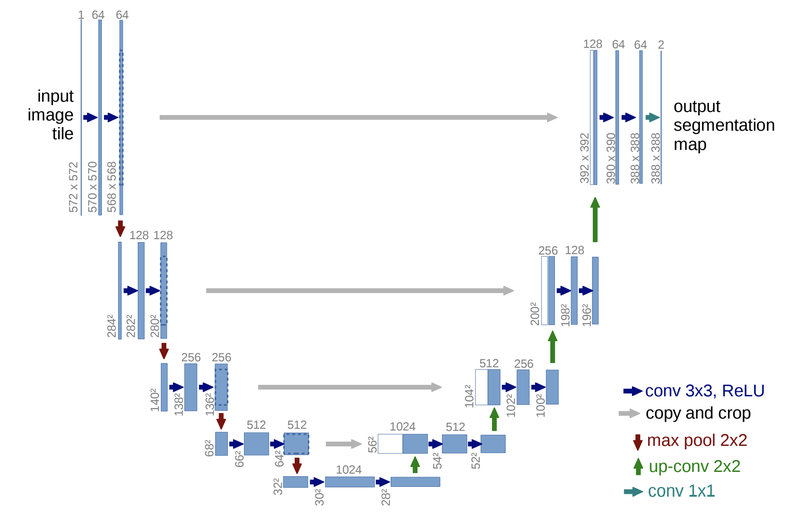
* FCN에서 upsampling을 통해서 특성 맵을 키운 것을 입력값과 대칭적으로 만들어 준 것.
* 네트워크 구조를 좌측의 Contracting path와 우측의 Expansive path 두 가지로 구분.
* 우측의 Contracting path는 일반적으로 우리가 사용해왔던 Convolution network와 유사한 구조 가짐. 각 블록은 두 개의 3x3 convolution 계층과 ReLu를 가지고 그 뒤로 downsampling을 위해서 2x2의 커널을 2 stride로 max pooling을 함. Downsampling을 거친 후 다음 convolution의 채널 크기는 두 배씩 늘어나도록 설계 됨.
* Expansive path에서는 각 블록에 2x2 up-convolution이 붙어 채널이 절반씩 줄어들고 특성 맵의 크기는 늘어나는데 contracting block과 동일하게 3x3 convolution이 두 개씩 사용됨.
* 두 Path에서 크기가 같은 블록의 출력과 입력은 skip connection처럼 연결해 주어 low-level의 feature를 활용할 수 있도록 함.
* 마지막에는 1x1 convolution으로 원하는 시맨틱 세그멘테이션 맵을 얻을 수 있음.

### (1) Tile(타일) 기법
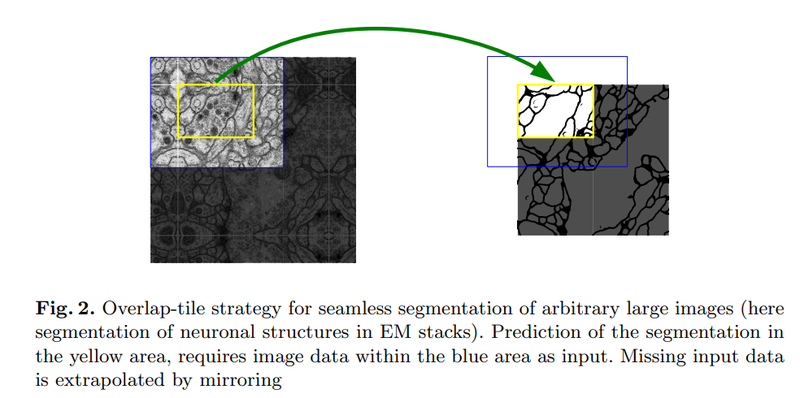
* FCN은 입력 이미지의 크기를 조정하여 세그멘테이션 맵을 얻어낸 반면, U-Net은 타일(tile) 방식을 사용해서 어느 정도 서로 겹치는 구간으로 타일을 나누어 네트워크를 추론, 큰 이미지에서도 높은 해상도의 세그멘테이션 맵을 얻을 수 있도록 했다.

### (2) 데이터 불균형 해결
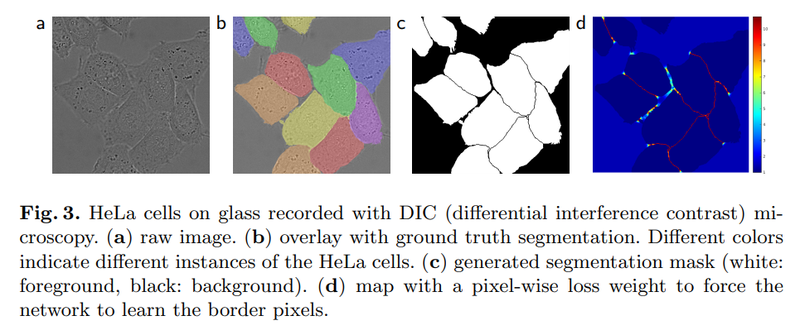
* 클래스 간 데이터 양의 불균형을 해결해 주기 위해서 분포를 고려한 weight map을 학습 때 사용한다.
* weight map의 weight는 손실 함수(loss)에 적용되는 가중치이다.

## 5. DeepLab 계열
### (1) DeepLabv3+
* DeepLab 모델이 제안된 뒤 이 모델을 개선하기 위해 Atrous Convolution와 Spatial Pyramid Pooling 등 많은 방법들이 제안됨.
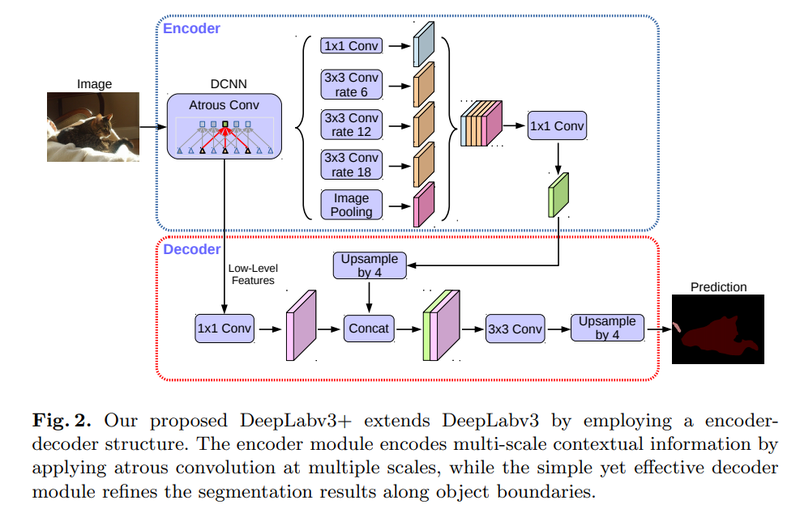
* U-Net에서의 Contracting path과 Expansive path의 역할을 하는 것이 여기서는 위 그림의 인코더(Encoder), 디코더(Decoder)임.
* 인코더는 이미지에서 필요한 정보를 특성으로 추출해 내는 모듈이고 디코더는 추출된 특성을 이용해 원하는 정보를 예측하는 모듈임.
* DeepLabV3+는 Atrous Convolution을 사용하고 있으며 trous Convolution을 여러 크기에 다양하게 적용한 것이 ASPP(Atrous Spatial Pyramid Pooling)임.
* ASPP가 있는 블록을 통해 특성을 추출하고 디코더에서 Upsampling을 통해 세그멘테이션 마스크를 얻음.
#### Atrous Convolution
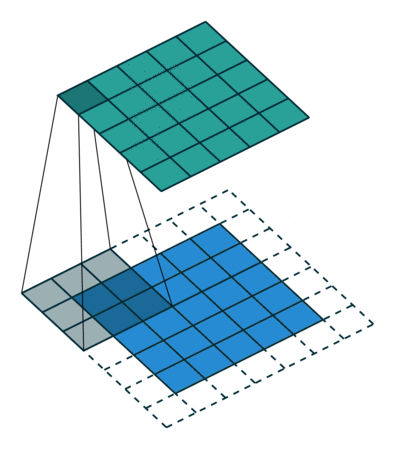
* Atrous Convolution은 간단히 말하면 "띄엄띄엄 보는 컨볼루션"임.
* Convolution은 좌측의 일반적인 컨볼루션과 달리 더 넓은 영역을 보도록 해주기 위한 방법으로 커널이 일정 간격으로 떨어져 있는데 이를 통해 컨볼루션 레이어를 너무 깊게 쌓지 않아도 넓은 영역의 정보를 커버할 수 있음.
#### Spatial Pyramid Pooling
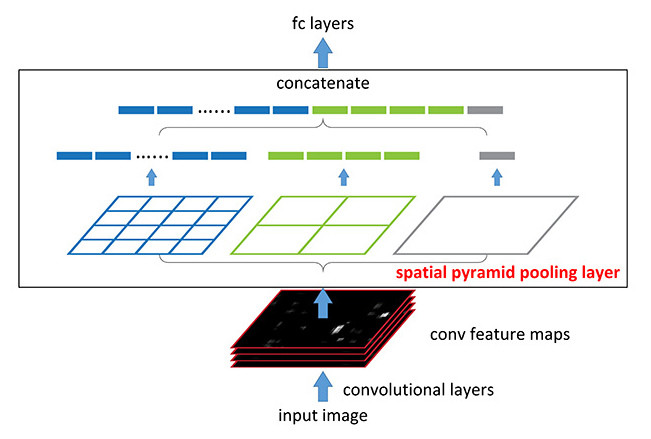
* Spatial Pyramid Pooling은 여러 가지 스케일로 convolution과 pooling을 하고 나온 다양한 특성을 연결(concatenate)함.
* 이를 통해서 멀티스케일로 특성을 추출하는 것을 병렬로 수행하는 효과를 얻을 수 있음.
* 이 때 컨볼루션을 Atrous Convolution으로 바꾸어 적용한 것을 Atrous Spatial Pyramid Pooling이라고 한다.
* 입력 이미지의 크기와 관계없이 동일한 구조를 활용할 수 있다는 장점이 있다.
* 그러므로 제각기 다양한 크기와 비율을 가진 RoI 영역에 대해 적용하기 유리하다.

## 6. 세그멘테이션 평가
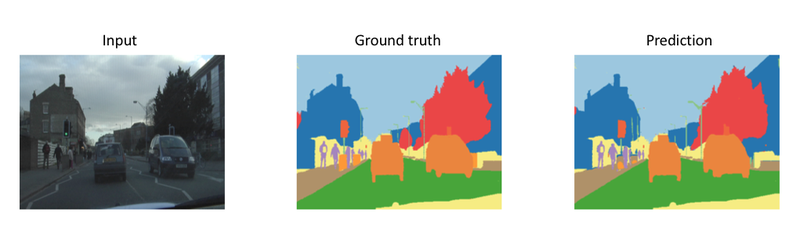
* https://www.jeremyjordan.me/evaluating-image-segmentation-models/
* 시맨틱 세그멘테이션의 결괏값을 이미지의 크기에 맞는 세그멘테이션 맵 크기와 시맨틱 클래스의 수에 맞는 채널 크기를 가진다.
* 여기서 각 채널의 max probability에 따라서 해당 위치의 클래스가 결정된다.

### (1) 픽셀별 정확도(Pixel Accuracy)
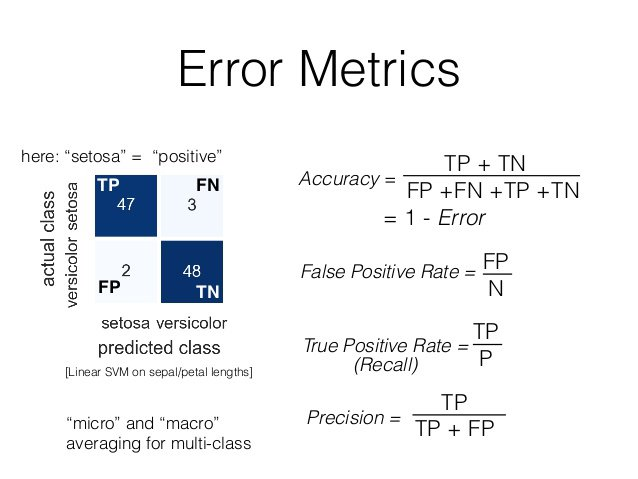
* 예측 결과 맵(prediction map)을 클래스 별로 평가하는 경우에는 이진 분류 문제(binary classification)로 생각해 픽셀 및 채널 별로 평가한다.
* 픽셀 별 이미지 분류 문제로 평가하는 경우에는 픽셀 별로 정답 클래스를 맞추었는지 여부, 즉 True/False를 구분한다.
* Error Metrics를 확인하면 (TP+TN)/(FP+FN+TP+TN)으로 Accuracy를 구할 수 있다.

### (2) 마스크 IoU(Mask Intersection-over-Union)
* 물체 검출 모델을 평가할 때는 정답 라벨(ground truth)와 예측 결과 바운딩 박스(prediction bounding box) 사이의 IoU(Intersection over Union)를 사용한다.
* 세그멘테이션 문제에서는 정답인 영역과 예측한 영역의 IoU를 계산할 수 있다.

In [ ]:
# IoU 계산
intersection = np.logical_and(target, prediction)
union = np.logical_or(target, prediction)
iou_score = np.sum(intersection) / np.sum(union)

## 7. Upsampling의 다양한 방법
### (1) Nearest Neighbor
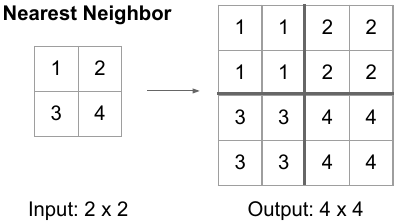
* scale을 키운 위치에서 원본에서 가장 가까운 값을 그대로 적용하는 방법이다.
* 위 그림처럼 2x2 matrix가 있을 때 이를 2배로 키우면 4x4 matrix가 된다.
* 이 때 좌측 상단으로부터 2x2는 입력 matrix의 1x1과 가장 가깝다.
* 따라서 해당 값을 그대로 사용한다.

### (2) Bilinear Interpolation
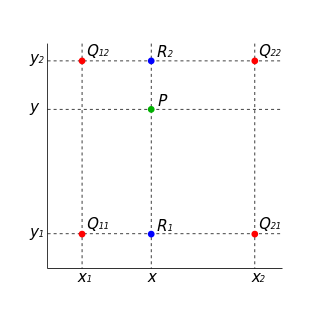
* 두 축에 대해서 선형 보간법을 통해 필요한 값을 메우는 방식이다.

### (3) Transposed Convolution
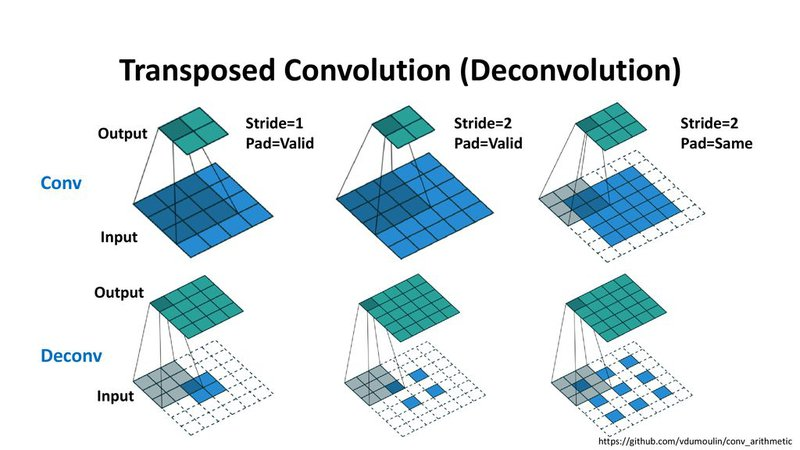
* 정해진 규칙에 따라서 upsampling하는게 아닌 학습할 수 있는 파라미터를 가진 Upsampling 방법이다.
* Kernel의 크기를 정의하고 입력된 Feature를 Window에 따라서 output을 계산하는 Convolution Layer와 반대의 연산을 하면서 거꾸로 학습된 파라미터로 입력된 벡터를 통해 더 넓은 영역의 값을 추정해낸다.